# Time Series Forescasting

In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [2]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

sales = pd.read_csv('sales-cars.csv',index_col=0, parse_dates=[0] ,date_parser=parser)

In [3]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [16]:
sales.Month[1]

Timestamp('2016-02-01 00:00:00')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
Month    36 non-null datetime64[ns]
Sales    36 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 656.0 bytes


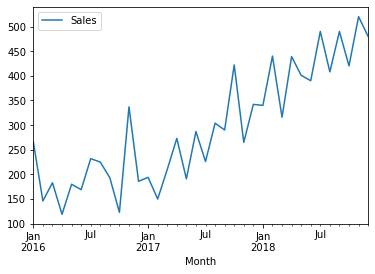

In [20]:
sales.plot()

Stationary means mean, variance and covariance is constant over periods.

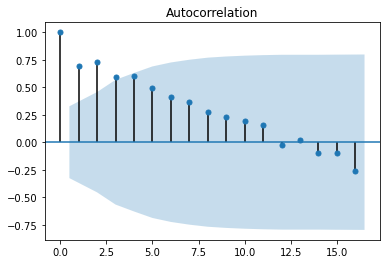

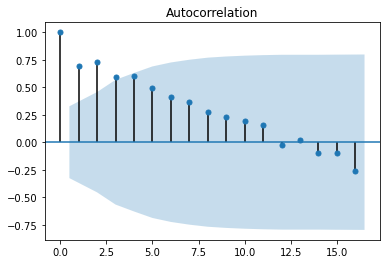

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

### Converting series to stationary

In [18]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [23]:
sales.shift(1)

,Sales
Month,
2016-01-01,NaN
2016-02-01,266.0
2016-03-01,146.0
2016-04-01,183.0
2016-05-01,119.0
2016-06-01,180.0
2016-07-01,169.0
2016-08-01,232.0
2016-09-01,225.0


In [4]:
sales_diff = sales.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model


In [5]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


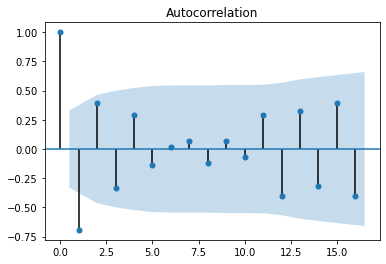

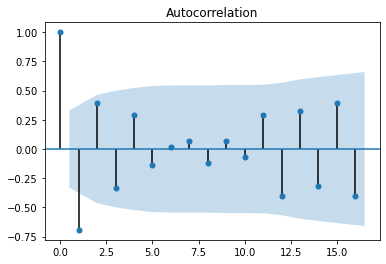

In [26]:
plot_acf(sales_diff)

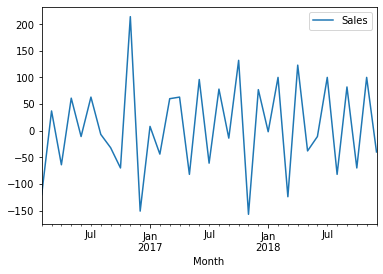

In [27]:
sales_diff.plot()

In [6]:
X = sales.values
train = X[0:27] # 27 data as train data
test = X[26:]  # 9 data as test data
predictions = []

In [29]:
train.size

27

# Autoreggresive AR Model

In [7]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [8]:
predictions = model_ar_fit.predict(start=26,end=36)

In [9]:
test

array([[316],
       [439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

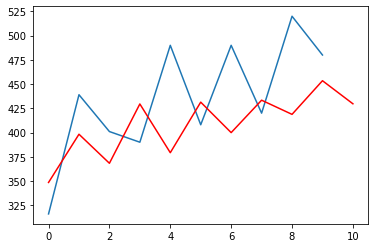

In [10]:
plt.plot(test)
plt.plot(predictions,color='red')

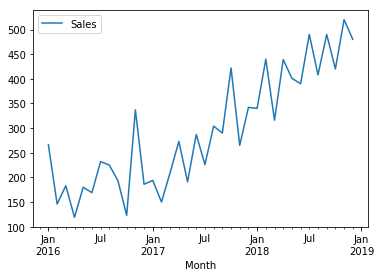

In [49]:
sales.plot()

# ARIMA model

In [11]:
from statsmodels.tsa.arima_model import ARIMA

In [12]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(9, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


297.16198427743416


In [13]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

array([396.05453065, 355.94745647, 413.10689321, 374.51470444,
       446.96177147, 378.63553951, 406.39885728, 411.40892739,
       475.92515656, 415.41742639])

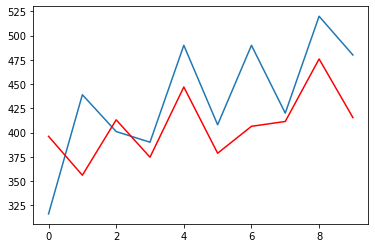

In [14]:
plt.plot(test)
plt.plot(predictions,color='red')

In [15]:
mean_squared_error(test,predictions)

2958.3842991252736

In [16]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))


In [17]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809384947
(0, 0, 2) 315.25060028727887
(0, 0, 3) nan
(0, 0, 4) 310.1669328592633
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841530678005
(0, 1, 2) 296.32292269078266
(0, 1, 3) 298.31202117389336
(0, 1, 4) 300.3393975617985
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019469685257
(0, 2, 2) 290.3983417235849
(0, 2, 3) 292.9858847060129
(1, 0, 0) 316.1668717534279
(1, 0, 1) 313.0487174406702
(1, 0, 2) 310.9790642275034
(1, 1, 0) 298.8325442271006
(1, 1, 1) 297.12565112585196
(1, 1, 2) 299.47166670629457
(1, 1, 3) 301.28511809480204
(1, 2, 0) 306.53077675708374
(2, 0, 0) 310.9969573612191
(2, 0, 1) 342.5246358294303
(2, 1, 0) 300.20895612399573
(2, 1, 1) 297.99999301674006
(2, 1, 2) 298.55054281302245
(2, 1, 3) 302.87208388612163
(2, 2, 0) 306.2975856431866
(3, 0, 0) 312.9838587473828
(3, 0, 1) 336.078521041164
(3, 1, 0) 294.85435842186024
(3, 1, 1) 295.9979353418612
(3, 1, 2) 292.66862386939545
(3, 1, 3) 294.6588907518689
(3, 2, 0) 299.4075868

## Dickey Fueller Test

In [18]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(sales["Sales"],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=["stat","p-value",'Lag','Number of observations'])
print(dfoutput)
           

stat                       1.636883
p-value                    0.997964
Lag                       10.000000
Number of observations    25.000000
dtype: float64


In [40]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(sales_diff["Sales"],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=["stat","p-value",'Lag','Number of observations'])
print(dfoutput)

stat                      -1.383201
p-value                    0.590303
Lag                       10.000000
Number of observations    24.000000
dtype: float64


In [45]:
sales_diff2 = sales.diff(periods=2)
sales_diff2 = sales_diff2[2:]
sales_diff2.head()

,Sales
Month,
2016-03-01,-83.0
2016-04-01,-27.0
2016-05-01,-3.0
2016-06-01,50.0
2016-07-01,52.0


In [46]:
dftest=adfuller(sales_diff2["Sales"],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=["stat","p-value",'Lag','Number of observations'])
print(dfoutput)

stat                      -1.498268
p-value                    0.534368
Lag                       10.000000
Number of observations    23.000000
dtype: float64


In [48]:
sales_diff3 = sales.diff(periods=3)
sales_diff3 = sales_diff3[3:]
sales_diff3.head()

,Sales
Month,
2016-04-01,-147.0
2016-05-01,34.0
2016-06-01,-14.0
2016-07-01,113.0
2016-08-01,45.0


In [49]:
dftest=adfuller(sales_diff3["Sales"],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=["stat","p-value",'Lag','Number of observations'])
print(dfoutput)

stat                      -2.284229
p-value                    0.177105
Lag                       10.000000
Number of observations    22.000000
dtype: float64
